In [41]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.datasets import load_digits

In [42]:
X,Y = load_digits(return_X_y=True)
X.shape, Y.shape

((1797, 64), (1797,))

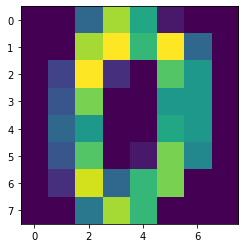

In [43]:
plt.imshow(X[0].reshape(8,8,1))

In [44]:
modelPCA = PCA()
X2PCA = modelPCA.fit_transform(X)

modelLDA = LinearDiscriminantAnalysis()
X2LDA = modelLDA.fit_transform(X,Y)

modelMDS = MDS(n_components=2)
X2MDS = modelMDS.fit_transform(X)

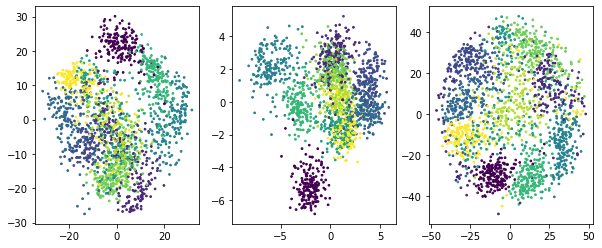

In [53]:
fig, ax = plt.subplots(1,3,figsize=(10,4))
ax[0].scatter(X2PCA[:,0],X2PCA[:,1], c=Y, s=3)
ax[1].scatter(X2LDA[:,0],X2LDA[:,1], c=Y, s=3)
ax[2].scatter(X2MDS[:,0],X2MDS[:,1], c=Y, s=3)
plt.show()

[0.149 0.136 0.118 0.084 0.058 0.049 0.043 0.037 0.034 0.031 0.024 0.023
 0.018 0.018 0.015 0.014 0.013 0.012 0.01  0.009 0.009 0.008 0.008 0.007
 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


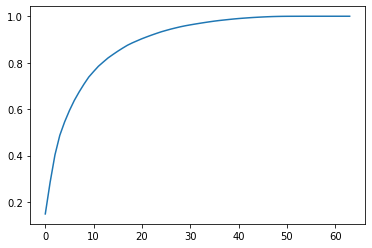

In [54]:
exp_var = modelPCA.explained_variance_ratio_
print(np.round(exp_var,3))
exp_var_acum = np.cumsum(exp_var)
plt.figure()
plt.plot(exp_var_acum)
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_4388\1653997143.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(1797, 3) (1797, 64)


Text(0.5, 0, 'Z')

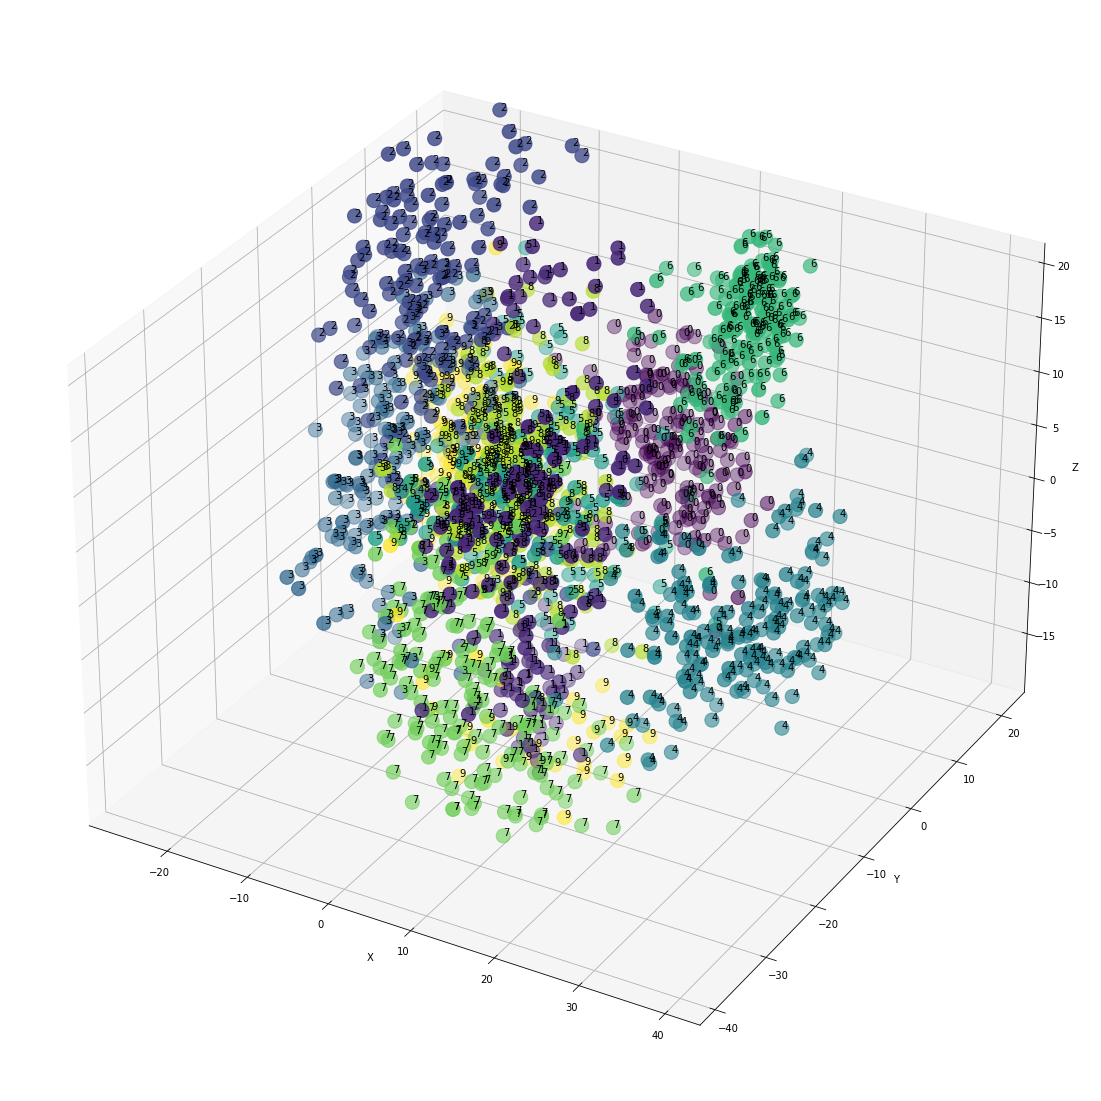

In [40]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

just = 50
X2 = X2PCA[:,:3]
# Y2 = Y[:just]
print(X2.shape, X2PCA.shape)

for i, ((x, y, z), name) in enumerate(zip(X2, Y)):
    
    label = '(%d, %d, %d)' % (x, y, z)
    ax.text(x, y, z, name)

ax.scatter(X2[:,0], X2[:,1], zs=X2[:,2], c=Y, label='points in (x,z)',s=200)

ax.set_xlim(np.min(X2[0])*3, np.max(X2[0])*2)
ax.set_ylim(np.min(X2[1])*2, np.max(X2[1])*3)
ax.set_zlim(np.min(X2[2])*2, np.max(X2[2])*3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')